# Tahoe Healthcare Systems
Investigating readmission ratesfor an integrated health care provider with Logistic Regression by Jaume Clave
April 25th, 2020

The high readmission level of hospital patients after they are discharged from the hospital is a significant concern for the US health care system. It is estimated that 20% of all hospitalized Medicare patients are readmitted within 30 days of hospitalization and 34% are readmitted within 90 days. The estimated cost of hospital readmissions is about $17.4 billion annually.

To address the problem, the 2010 Affordable Care Act established a hospital readmissions reduction program (HRRP). The program created financial incentives for hospitals to reduce readmissions by linking Medicare reimbursements to a hospital’s risk-adjusted readmission rate. For 2012, penalties could be as much 1% of the total reimbursements a hospital received for the three target conditions. In the first year of the program, 2,225 hospitals were subject to reduced payment penalties, with penalties totaling $225 million nationwide. The maximum penalties were set to increase to 3% of reimbursements by 2014.

Tahoe Healthcare Systems is an integrated health care provider that owns and operates 14 hospitals in the Pacific Northwest. Tahoe had already paid over USD 750,000 in fines in 2012 because their readmission rates exceeded the risk-adjusted targets. Under the new 2014 penalty rates, Tahoe’s CFO, Leila Houssein, estimated its loss in Medicare reimbursements would rise to $8,000 per readmitted patient by 2014 if nothing was done to reduce the readmissions rates. 

This paper studies the hospitals readmission rate and the costs associated with the Medicare penalties. The paper also considers a CareTracker program that aims to help paitents post care and reduce readmission rates in order to reduce Medicare penalties. A logistic regression model is applied to determine the best possible threshold, based on patient readmittence probabiloty, to apply when deciding to offer the CareTracker program or not.  

## Index

[Data Import and Exploration](#Data-Import-and-Exploration)  

[Lost Medicare Reinbursment Costs](#Lost-Medicare-Reinbursment-Costs)  
[Cost of CareTracker for all Patients](#Cost-of-CareTracker-for-all-Patients)  
[Best Case Cost Savings](#Best-Case-Cost-Savings)  
[Patient Readmittance Model based on Patient Severity Score](#Patient-Readmittance-Model-based-on-Patient-Severity-Score)  
[Logistic Regression Benchmark Model](#Logistic-Regression-Benchmark-Model)  
[Probabilistic Patient Readmittance with Hypertuned Logistic Regression Model](#Probabilistic-Patient-Readmittance-with-Hypertuned-Logistic-Regression-Model)  

## Data Import and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Import Tahoe Healthcare Systems Data
data = pd.read_csv(
    r'C:\Users\Jaume\Documents\ICBS - MSc Business Analytics\Advanced Machine Learning\Assignment 1\Tahoe_Healthcare_Data.csv')

Given these positive results and the concern over the impact of HRRP penalties over the coming years, Tahoe’s management was contemplating rolling out CareTracker to all its hospitals. Before doing so, however, it is important to provide management with a better sense of the costs and benefits of the program. The pulled data on all Tahoe system admissions over the last year for patients with AMI serves to this end. 

This data will be studied and analysed to answer some questions management needs to consider before finializing a decision on which programme to roll out.

The data file has 4382 rows and 7 columns. The columns have the following description:

    age:                Age at time of admission
    sex: Gender.        0 = Male. 1 = Female.
    flu_season:         Flu Season (1 = Yes). Admission starting December through March
    ed_admit:           Admitted through the ED (1 = Yes).
    severity score:     Generic physiologic severity of illness score based on lab tests and vital signs
    comorbidity score:  Severity score based on patients’ pre-existing diagnoses.
    readmit30:          Indicator for hospital readmission within 30 days. 1 if readmitted, 0 otherwise.

    

In [3]:
print(f'The shape of the dataset is {data.shape}')
data.head()

The shape of the dataset is (4382, 7)


,age,female,flu_season,ed_admit,severity score,comorbidity score,readmit30
0,100,1,1,1,38,112,0
1,83,1,0,1,8,109,1
2,74,0,1,0,1,80,0
3,66,1,1,1,25,4,0
4,68,1,1,1,25,32,0


The statistical properties of the data need to be examined to gain a quick understanding each feature.

In [4]:
data.describe()

,age,female,flu_season,ed_admit,severity score,comorbidity score,readmit30
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,76.847330,0.469192,0.408033,0.809220,22.353263,94.735509,0.227750
std,7.904949,0.499107,0.491525,0.392961,18.005320,57.145155,0.419428
min,65.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,70.000000,0.000000,0.000000,1.000000,8.000000,51.000000,0.000000
50%,76.000000,0.000000,0.000000,1.000000,19.000000,86.000000,0.000000
75%,82.000000,1.000000,1.000000,1.000000,32.000000,131.000000,0.000000
max,105.000000,1.000000,1.000000,1.000000,112.000000,322.000000,1.000000


A correlation matrix is plotted to visually discover if there are any correlations between features. The strongest correlations exist with the readmit30 feature and both the severity and comorbidity score. This works out as the higher those scores the more intense the generic physiologic severity of illness and the pre-exisitng conditions of the patient respectively

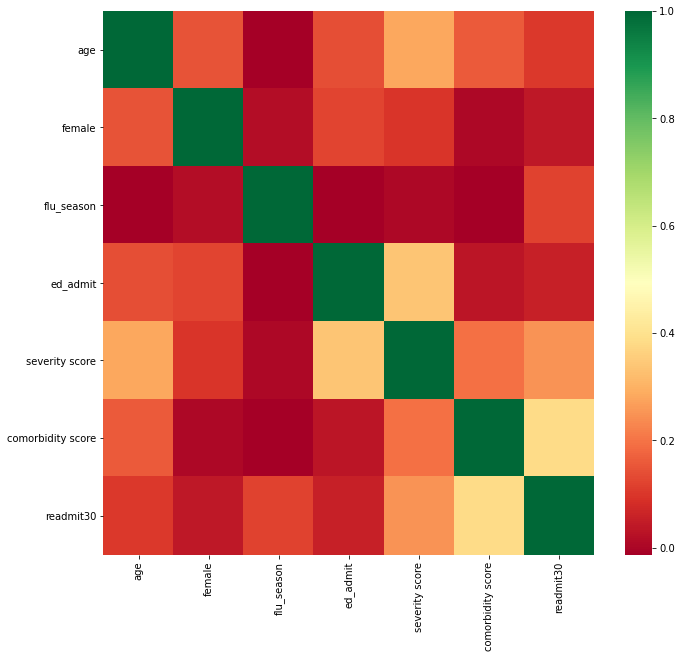

In [5]:
## Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(11,10))
sn.heatmap(corr_matrix, cmap = "RdYlGn")
plt.show()

## Lost Medicare Reinbursment Costs
The hospital wants to consider all options, of of those being not implementing CareTracker. If it decides to do this, Tahoe will incur a cost due to the loss in Medicare reimbursements. The loss per patient, has been determined to be $8000 as described in the brief.

In order to find the total costs, the amount of readmitted patients needs to be multiplied with the $8000 dollar per patient price.

In [6]:
## Count readmitted patients from the readmit30
num_readmitted = len(data['readmit30'].loc[data['readmit30'] == 1])
lost_medicare = num_readmitted * 8000
print(f"The amount of readmit30 patients is: {num_readmitted}", '\n')
print(
    f"The cost Tahoe due to the loss in Medicare reimbursements will be ${lost_medicare} dollars")

The amount of readmit30 patients is: 998 

The cost Tahoe due to the loss in Medicare reimbursements will be $7984000 dollars


## Cost of CareTracker for all Patients
Another option Tahoe must consider is to implement CareTracker for all AMI patients. The AMI programme has been successfully trialed in a Seattle hospital. CareTracker combined patient education during and post hospitalization with periodic at-home monitoring of patients after discharge. The early results were promising: in the pilot study, CareTracker reduced the incidence of readmissions by 40% compared to a control group of patients not receiving the extra CareTracker treatment. However, the cost of the program was high; approximately $1,200 per patient.

This section will suppose CareTracker was implemented for all AMI patients and it will find the net changein cost (over the status quo) from doing this. Answering if Tahoe should implement CareTracker for all AMI patients?

In [7]:
caretracker_cost = len(data) * 1200
print(f'The cost to implement CareTracker on all AMI patients is ${caretracker_cost} dollars')

The cost to implement CareTracker on all AMI patients is $5258400 dollars


There is the readmission rate that needs to be taken into account as well. The current readmission rate and the CareTracker readmission rate are calculated below

In [8]:
curr_readmissionr = round(num_readmitted / len(data) * 100, 2)
care_tracker_readmissionr = round(num_readmitted / len(data) * 100 * (1 - 0.4), 2)
print(f"The current readmission rate is {curr_readmissionr}%")
print(
    f"The readmission rate with the CareTracker programme implemented to all patients is {care_tracker_readmissionr}%")

The current readmission rate is 22.77%
The readmission rate with the CareTracker programme implemented to all patients is 13.66%


In [9]:
lost_medicare_caretrackr = int((1 - 0.4) * num_readmitted * 8000)
print(
    f"The readmission cost when taking into consideration the CareTracker programme for all"
    f"AMI patients is ${lost_medicare_caretrackr} dollars")

The readmission cost when taking into consideration the CareTracker programme for allAMI patients is $4790400 dollars


In [10]:
total_caretracker_costs = lost_medicare_caretrackr + caretracker_cost
print(f'The total cost (CareTracker and lost Medicare reinbursements) with the CareTracker'
      f'readmission rate is ${total_caretracker_costs} dollars')

The total cost (CareTracker and lost Medicare reinbursements) with the CareTrackerreadmission rate is $10048800 dollars


Now that the lost Medicare reinbursements costs, assuing CareTracker has been serviced to all hospital patients, have been calculauted, the net difference between them can be found. If the number is postivie Tahoes management should implement the program across all patients as the savings will be greater than the costs however, a new startegy will need to be found if the value is negative

In [11]:
print(f'The total net change in cost (over the status quo) is ${lost_medicare- total_caretracker_costs} dollars')

The total net change in cost (over the status quo) is $-2064800 dollars


## Best Case Cost Savings
This is bad news as if the hospital wants to implement the CareTracker program to all patients it will end up losing +$2 million dollars. It may be possible to apply CareTracker to the subset of the AMI patient population who are most at risk (of readmission) and save money in the process. Tahoe want to build a classification model to predict those AMI patients who will be admitted and those who won’t. Before doing so, however, they want to estimate an upper bound on the possible savings they could make using such a classification
model. 

The upper bound for this model can be calculated by assuming that Tahoe have perfect foresight regarding what patients will need to be readmitted. The savings can be calculated from this foresight

In [12]:
cost_optimum_caretaker = 1200 * num_readmitted
optimum_total_cost = cost_optimum_caretaker + lost_medicare_caretrackr
print(
    f'The cost incurred by the hospital, including the CareTracker program and list Medicare reinbursements,\n'
    f'in the absolute best case scenario are ${optimum_total_cost} dollars')
print(f'\nThe upper bound on savings the hospital can expect is ${lost_medicare - optimum_total_cost} dollars')

The cost incurred by the hospital, including the CareTracker program and list Medicare reinbursements,
in the absolute best case scenario are $5988000 dollars

The upper bound on savings the hospital can expect is $1996000 dollars


## Patient Readmittance Model based on Patient Severity Score
A simple classification algorithm that can be considered is one that basis its understanding of readmitted patients on the patients severity score. As shown below, the mean value of severity.score is considerably higher for readmitted patients (readmit30 = 1) than it is for patients who were not readmitted (readmit30 = 0). 

A simple classifier which predicts that a patient will be readmitted if the patient’s severity score, S, satisfies S > S∗, for some fixed threshold S will be built below. The cost savings against the severity score will be plotted following.

In [13]:
severity_score_readmitted_1 = data['severity score'].loc[data['readmit30'] == 1].mean()
severity_score_readmitted_0 = data['severity score'].loc[data['readmit30'] == 0].mean()
print(f'The mean value for severity score for patients who have been readmitted is {round(severity_score_readmitted_1)}')
print(f'The mean value for severity score for patients who have not been readmitted is {round(severity_score_readmitted_0)}')

The mean value for severity score for patients who have been readmitted is 31
The mean value for severity score for patients who have not been readmitted is 20


In [14]:
## Function calculating cost savings for each severity score
cost_saving = dict()

for s in range(25, 101):
    df = data.loc[data['severity score'] >= s]
    num_patients = len(df)
    cost_ct = num_patients * 1200
    true_positives = len(data[(data['severity score'] >= s) & (data['readmit30'] == 1)])
    false_negatives = num_readmitted - true_positives
    cost = cost_ct + (true_positives * 8000 * 0.6 )+ (false_negatives * 8000)
    cost_change = lost_medicare - cost
    cost_saving[s] = cost_change

In [15]:
## Creating cost saving dataframe
cost_saving_df = pd.DataFrame.from_dict(cost_saving, orient='index')
cost_saving_df.reset_index(inplace = True)
cost_saving_df.columns = ['severity score', 'cost savings']

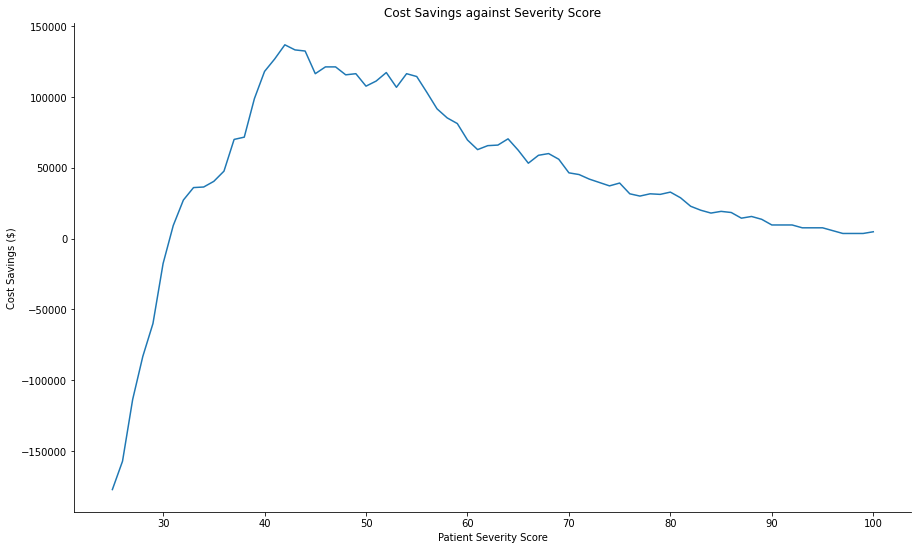

In [16]:
## Plotting the savings per severity score
plt.figure(figsize = (15,9))
plt.plot(cost_saving_df['severity score'], cost_saving_df['cost savings'], color = '#1f78b4')
plt.title('Cost Savings against Severity Score')
plt.ylabel('Cost Savings ($)')
plt.xlabel('Patient Severity Score')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.show()

In [17]:
print(f"The highest cost saving is a cost saving of"
      f"${int(cost_saving_df['cost savings'].max())} dollars and this occurs at a"
      f"severity score of {cost_saving_df.sort_values('cost savings', ascending = False)['severity score'].iloc[0]}")

The highest cost saving is a cost saving of$136800 dollars and this occurs at aseverity score of 42


## Logistic Regression Benchmark Model
The classification model built above, focused on patient severity score is very crude. In order to present a better model and more efficiently classify patients so that overall hospital costs are minimized a more sophisticated algorithm must be built. Tahoe Healthcare Systems are interested in logistic regression to fit a model using the entire data-set to estimate the
probability of readmission. 

This section creates a train and test set from the original dataset in order to be able to fit and predict a logistic regression model to the data. Firstly, a logistic regression classifier is fit to the data without any hyperparameter tuning in order to establish benchmark preformance. The classification results are displayed with a confusion matrix and various other key preformance metrics are calculated. The precision-recall curver and the roc curve are also generated. Following this, hyperparameter are tuned and optimized for using grid search cross-validation

In [18]:
from sklearn.model_selection import train_test_split
X = data.drop('readmit30', axis = 1)
y = data['readmit30']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
print(f'The size of the training set is {X_train.shape} datapoints')
print(f'The size of the validation set is {X_test.shape} datapoints')

The size of the training set is (3505, 6) datapoints
The size of the validation set is (877, 6) datapoints


In [20]:
## Create variables numerical attributes
num_attribs = X_train.columns[6:]

In [21]:
## Transformation pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline(
    [('std_scalar', StandardScaler()),]
    )

In [22]:
## Preparing the data
X_train_prepared = num_pipeline.fit_transform(X_train)
print(X_train_prepared.shape)

(3505, 6)


In [23]:
## Transform the tes set
X_test_prepared = num_pipeline.transform(X_test)
print(X_test_prepared.shape)

(877, 6)


A benchmark logistic regression model is created and fitted to the data. It is then evaluated on the test set. Following a grid search will be completed on the logistic regression model in order to improve its perfomance. The optimised model will then be retrained on the entire dataset

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, recall_score
def classification_score(y_val, y_val_predictions):
    print(f'The confusion matrix is: \n \n{confusion_matrix(y_val, y_val_predictions)} \n')
    print(f'The precision score is: {precision_score(y_val, y_val_predictions)}')
    print(f'The recall score is: {recall_score(y_val, y_val_predictions)}')
    print(f'The F1 score is: {f1_score(y_val, y_val_predictions)}')

In [25]:
import scikitplot as skplt
def ml_model(models):
    model = models
    model.fit(X_train_prepared, y_train)
    y_test_predictions = model.predict(X_test_prepared)
    print(model, '\n')
    print(classification_score(y_test, y_test_predictions))
    print(classification_report(y_test, y_test_predictions), '\n')
    try:
        y_test_proba_pred = model.predict_proba(X_test_prepared)
        skplt.metrics.plot_precision_recall(y_test, y_test_proba_pred,figsize = (7, 7))
        skplt.metrics.plot_roc(y_test, y_test_proba_pred,figsize = (7, 7))
        plt.show()
    except:
        pass

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

The confusion matrix is: 
 
[[629  38]
 [142  68]] 

The precision score is: 0.6415094339622641
The recall score is: 0.3238095238095238
The F1 score is: 0.430379746835443
None
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       667
           1       0.64      0.32      0.43       210

    accuracy                           0.79       877
   macro avg       0.73      0.63      0.65       877
weighted avg       0.77      0.79      0.77       877
 



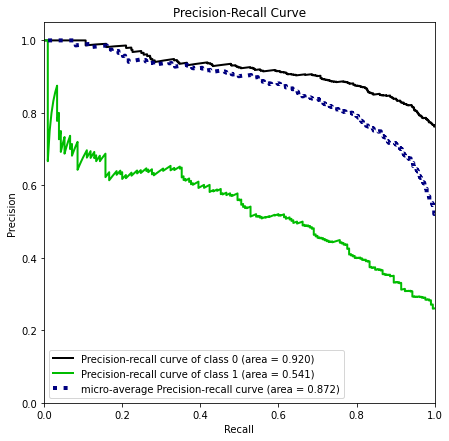

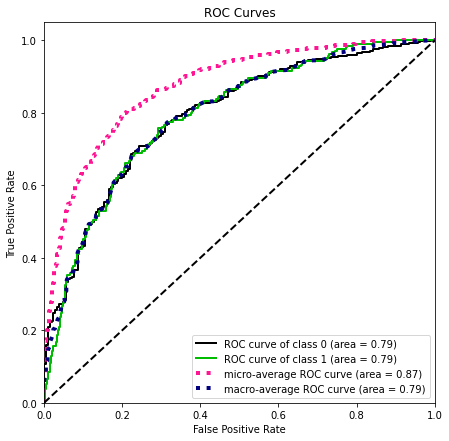

In [26]:
## Fitting and predicting a base logistic regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
ml_model(LogisticRegression())

In [27]:
# First value in list corresponds to the probability that the patient is not readmitted
lr.fit(X_train_prepared, y_train)
y_test_predictions = lr.predict_proba(X_test_prepared)
y_test_predictions

array([[0.93760527, 0.06239473],
       [0.7884316 , 0.2115684 ],
       [0.19536402, 0.80463598],
       ...,
       [0.82023663, 0.17976337],
       [0.53593863, 0.46406137],
       [0.80690386, 0.19309614]])

The dataset we are working with is an unbalanced dataset. The difference in weights can be found using sklearns compute_class_weight function. This returns a dictionary and this will be utilised as a parameter in the grid search 

In [28]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict     

{0: 0.6450128818549871, 1: 2.223984771573604}

Grid-searching is the process of scanning the data to configure optimal parameters for a given model. This is refered to as hyperparameter tunning or hyperparameter optimization which is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

The traditional way of performing hyperparameter optimization has been grid search which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, in this case it will be recall, typically measured by cross-validation on the training set.

In [29]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
parameters = [
    {"penalty" : ['l1'], 'solver' : ['liblinear', 'saga'], 'C' : [0.001, 0.01, 0.1, 1, 1.1], 'fit_intercept' : [True, False],
    'class_weight' : [class_weight_dict, None], 'random_state' : [42], 'n_jobs' : [-1]}, 
    {"penalty" : ['l2'], 'solver' : ['newton-cg', 'lbfgs', 'sag', 'liblinear'],
    'C' : [0.001, 0.01, 0.1, 1, 1.1], 'fit_intercept' : [True, False], 'class_weight' : [class_weight_dict, None],
    'random_state' : [42], 'n_jobs' : [-1]},
    {"penalty" : ['l2'], "solver" : ['liblinear'], 'dual' : [True, False], 'C' : [0.001, 0.01, 0.1, 1, 1.1], 
    'fit_intercept' : [True, False], 'class_weight' : [class_weight_dict, None], 'random_state' : [42], 'n_jobs' : [-1]}
    ]

grid = GridSearchCV(lr,
                    parameters, n_jobs=-1,
                    scoring="roc_auc")

grid_results = grid.fit(X_train_prepared, y_train)

In [30]:
print(grid.best_params_)

{'C': 0.01, 'class_weight': {0: 0.6450128818549871, 1: 2.223984771573604}, 'fit_intercept': True, 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42, 'solver': 'sag'}


LogisticRegression(C=0.01,
                   class_weight={0: 0.6450128818549871, 1: 2.223984771573604},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=-1,
                   penalty='l2', random_state=42, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False) 

The confusion matrix is: 
 
[[497 170]
 [ 61 149]] 

The precision score is: 0.4670846394984326
The recall score is: 0.7095238095238096
The F1 score is: 0.5633270321361058
None
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       667
           1       0.47      0.71      0.56       210

    accuracy                           0.74       877
   macro avg       0.68      0.73      0.69       877
weighted avg       0.79      0.74      0.75       877
 



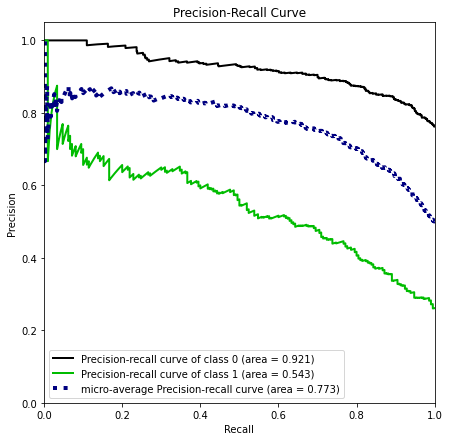

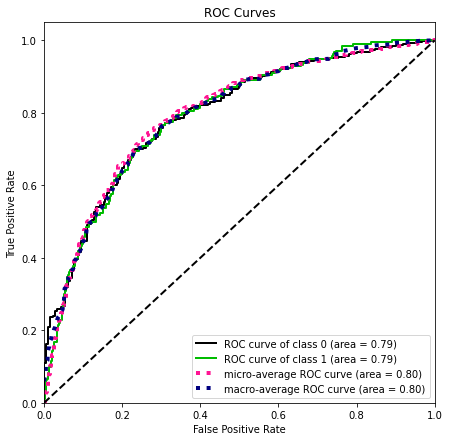

In [31]:
ml_model(grid.best_estimator_)

The desired model has been found through grid search and is presented above. This model will now be trained on the entire dataset 

In [32]:
X_prepared = num_pipeline.transform(X)
print(X_prepared.shape)

(4382, 6)


In [33]:
## Fitting the LR model to the entire dataset
lr = LogisticRegression(
    C = 0.01, class_weight = {0: 0.6450128818549871, 1: 2.223984771573604}, fit_intercept = True, 
    n_jobs = -1, penalty = 'l2', random_state = 42, solver = 'sag')
lr.fit(X, y)

LogisticRegression(C=0.01,
                   class_weight={0: 0.6450128818549871, 1: 2.223984771573604},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=-1,
                   penalty='l2', random_state=42, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

## Probabilistic Patient Readmittance with Hypertuned Logistic Regression Model
Classifiers like logistic regression use a threshold to determine whether to label the datapoint is a postive instance or a negative instance. With its default setting the logistic regression classifier fitted above will predict an instance as the postive class when p >= 0.5 (where p is the probability of that class being a positive instance) and it will predict an instance as the negative class when p < 0.5.

We can vary the threshold of classification for a model in order to construct a series of classifiers based on the predicted probability of re-admission. This section considers a classifier which predicts a patient will be readmitted if the patient’s estimated probability (p) of readmission (according to the fitted logistic regression model) satisfies p > p∗, for some fixed threshold p.

Decision thresholds from 0.1 to 0.9, with a step size of 0.01 will be considered. The cost savings for each threshold will be calculated at each increment and plotted in order to obtain the optimial threshold p that allows for the highest cost saving.

In [34]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

In [35]:
## Function calculating cost savings for each probability threshold
lr_cost_saving = dict()

for p in np.arange(0.1, 0.9, 0.01):
    y_probability = lr.predict_proba(X)[:, 1]
    df = pd.DataFrame(y_probability)
    df = df.loc[df[0] >= p]
    num_patients = len(df)
    cost_ct = num_patients * 1200
    y_pred_adj = adjusted_classes(y_probability, p)
    cm = pd.DataFrame(confusion_matrix(y, y_pred_adj), columns=['pred_neg', 'pred_pos'], index=['neg', 'pos'])
    true_positives = cm['pred_pos'][1]
    false_negatives = cm['pred_neg'][1]
    cost = cost_ct + (true_positives * 8000 * 0.6 )+ (false_negatives * 8000)
    cost_change = lost_medicare - cost
    lr_cost_saving[p] = cost_change

In [36]:
## Creating cost saving dataframe
lr_cost_saving_df = pd.DataFrame.from_dict(lr_cost_saving, orient='index')
lr_cost_saving_df.reset_index(inplace = True)
lr_cost_saving_df.columns = ['probability threshold', 'cost savings']

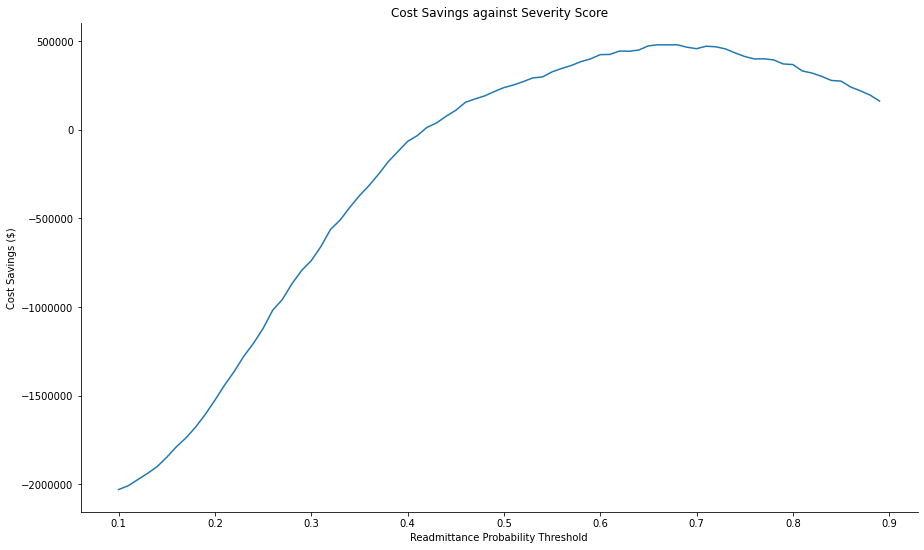

In [37]:
## Plotting the savings per severity score
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(lr_cost_saving_df['probability threshold'], lr_cost_saving_df['cost savings'], color = '#1f78b4')
plt.title('Cost Savings against Severity Score')
plt.ylabel('Cost Savings ($)')
plt.xlabel('Readmittance Probability Threshold')
plt.gca().spines['right'].set_color('none')
ax.ticklabel_format(useOffset=False)
ax.ticklabel_format(useOffset=False, style='plain')
plt.gca().spines['top'].set_color('none')
plt.show()

In [38]:
print(
    f"The highest cost saving is a cost saving of ${int(lr_cost_saving_df['cost savings'].max())}"
    f" dollars and this occurs at a severity score of "
    f"{round(lr_cost_saving_df.sort_values('cost savings', ascending = False)['probability threshold'].iloc[0], 2)}")

The highest cost saving is a cost saving of $479200 dollars and this occurs at a severity score of 0.66


## Conclusion
Hospitals, like every other business, have a need to reduce their costs in order to maintain stability. In FY 2013, payment penalties were based on hospital readmissions rates within 30 days for heart attack, heart failure and pneumonia. In FY 2015, CMS added readmissions for patients undergoing elective hip or knee replacement and patients with chronic obstructive pulmonary disease. CMS will add readmissions for coronary artery bypass procedures in FY 2017 and likely will add other measures in the future. Hospital have not only a moral obligation but also huge financial incentives to reduce readmission rates.

These rates can be lowered by imporving the patient engagenment and education during and post care in order to teach the patient the best way to keep healthy and out of medical attention. Hospitals can improve caregiver and patient engagement by educating patients about follow-up care. Providers need to make time for patient questions during the hospitalization and employ methods such as information teach-back in which providers explain conditions, treatment options, and self-care instructions to patients and patients repeat the information back to providers.

This project shed light on the astronomical costs a hospital may incur if these rates are not lowered and also found what the saving might be if they are able to lower them. More and more the healthcare industry will rely on machine learning models to provide answers and help make (potentially) costly decisions. 

## Further Reading

#### Medicade and Hospital Readmissions Reduction Program
https://www.cms.gov/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4439931/

#### Statistical Classification
https://en.wikipedia.org/wiki/Statistical_classification  
https://www.edureka.co/blog/classification-in-machine-learning/  

#### Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  
https://machinelearningmastery.com/logistic-regression-for-machine-learning/  
https://en.wikipedia.org/wiki/Logistic_regression